# Text
More text but smaller

# Task 1: Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import einops
from einops import rearrange, repeat

import math

1) Download the MNIST dataset using the torchvision library and create a subset
of the dataset containing 1,000 samples. Each sample will include a 28 x 28 pixel
image, along with a single integer value denoting the sample's respective class (number).

In [2]:
#download and load data
from torchvision import datasets
mnist = datasets.MNIST('./data', train=True, download=False) #download should be True for first-time download

mnist = mnist._load_data()

In [3]:
#select subset of images and labels
(images, labels) = mnist
print(images.shape, labels.shape)

imgs = images[:1000]
lbls = labels[:1000]

print(imgs.shape, lbls.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([1000, 28, 28]) torch.Size([1000])


2) Plot a histogram of classes in your subset of MNIST.

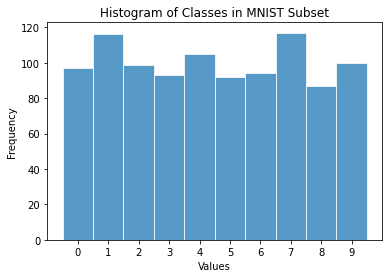

In [4]:
import matplotlib.pyplot as plt

bins=np.arange(11)-0.5
plt.hist(lbls, bins, edgecolor='white', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in MNIST Subset')
plt.xticks(range(10))

plt.show()

3) Use the einops python package to batch the subset of MNIST images. Each
batch should contain 25 different samples.

In [5]:
#Batching into 40 sets of 25 images
print(imgs.shape)

batched_imgs = einops.rearrange(imgs, '(n s) h w -> n s 1 h w', s=25)
print(batched_imgs.shape)


torch.Size([1000, 28, 28])
torch.Size([40, 25, 1, 28, 28])


4) Randomly select an MNIST image sample and, using matplotlib, plot it in three
dimensions. The x and y-axis should be the respective pixel locations, and the
z-axis should be the pixel intensity.

Plotting image at idx 23 from batch 0


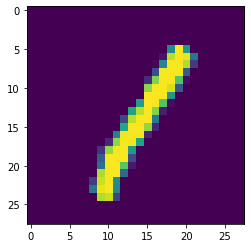

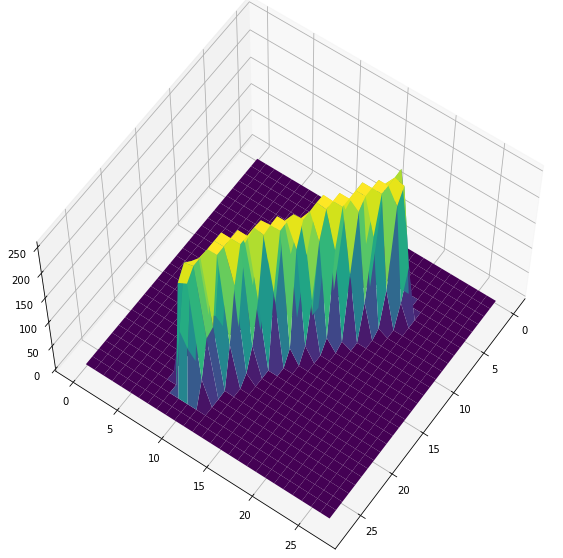

In [6]:
from mpl_toolkits.mplot3d import Axes3D

#select batch & image from batch
bat = np.random.randint(0,len(batched_imgs))
batch = batched_imgs[bat]
idx = np.random.randint(0, len(batch))
img = batch[idx]
print('Plotting image at idx', idx, 'from batch', bat)

#for fun, show 2D image selected
plt.imshow(img[0])
plt.show()

#set up array of the pixel locations
x, y = np.meshgrid(range(28), range(28))

#prepare plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10,10)

#plot image, x & y reversed to orient correctly
ax.plot_surface(y, x, img[0], cmap='viridis')
ax.view_init(60,35)
plt.show()

# Task 2: Time Series

Load the data

In [7]:
import pandas as pd

df = pd.read_csv(r'data/energydata_complete.csv', index_col=0, parse_dates=True)

1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.

Energy Consumption for Whole Period


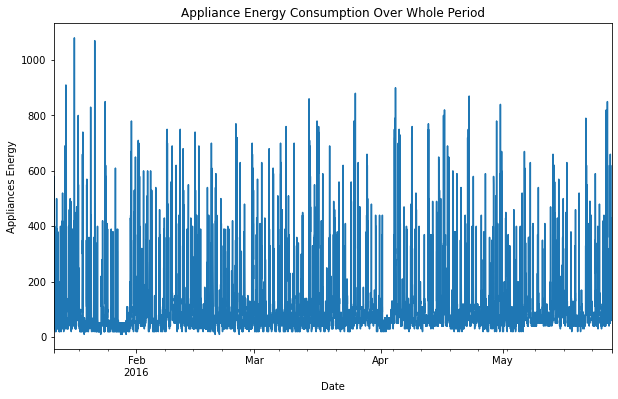


Energy Consumption for Week of 01/12/2016-01/18/2016


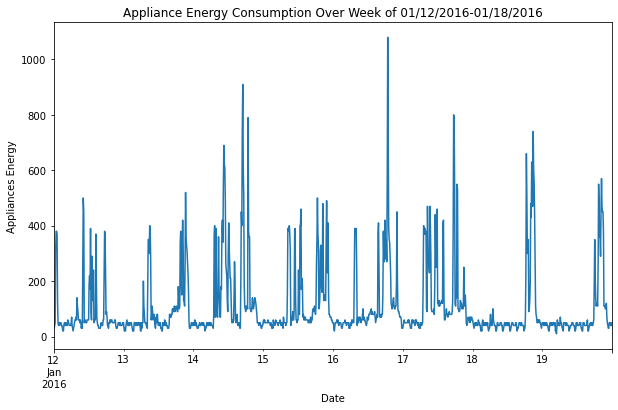

In [8]:
#whole period
print('Energy Consumption for Whole Period')
plt.figure(figsize=(10,6))
df['Appliances'].plot()
plt.xlabel('Date')
plt.ylabel('Appliances Energy')
plt.title('Appliance Energy Consumption Over Whole Period')
plt.show()


#One Week
print('\nEnergy Consumption for Week of 01/12/2016-01/18/2016')
plt.figure(figsize=(10,6))
week_subset = df['2016-01-12':'2016-01-19']
week_subset['Appliances'].plot()
plt.xlabel('Date')
plt.ylabel('Appliances Energy')
plt.title('Appliance Energy Consumption Over Week of 01/12/2016-01/18/2016')
plt.show()

2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.

In [ ]:
#non-seaborn heatmap


In [9]:
#seaborn setup for "easy" heatmapping

#!pip install --upgrade pip
#!pip install seaborn

#!conda install -c anaconda seaborn

In [21]:
import seaborn as sns
#from pandas import seaborn

energy_data = np.empty((7, 24, 1))

for i in range(7):
    for j in range(24):
        sum1 = 0
        for k in range(5):
            sum1 += dApp[(i * 24 + j) * 5 + k]
        energy_data[i, j, 0] = sum1

energy_data_r = energy_data.reshape(7, 24)
energy_data_t = energy_data_r.T

plt.figure(figsize=(10, 8))

ax = sns.heatmap(energy_data_t, cmap='YlGnBu', cbar_kws={'label': 'Energy'})
ax.set_yticks(np.arange(0.5, 24.5, step=1))
ax.set_yticklabels(['{:02d}:00'.format(i) for i in range(24)], rotation=0)

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Energy Consumption by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

plt.show()


ModuleNotFoundError: No module named 'seaborn'

40
2016-01-12 01:40:00
1


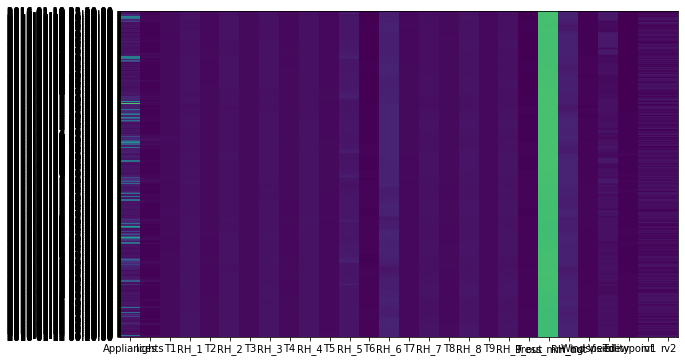

In [11]:
#testing/getting info about how to handle this

print(week_subset['Appliances'][10])
print(week_subset.index[10])
print(week_subset.index[10].hour)

#week_subset.style.background_gradient(cmap='Blues')
#week_subset.head()
plt.figure(figsize=(10,6))
plt.pcolor(week_subset)
plt.yticks(np.arange(0.5, len(week_subset.index), 1), week_subset.index)
plt.xticks(np.arange(0.5, len(week_subset.columns), 1), week_subset.columns)
plt.show()




3. Plot the histogram of energy consumption of appliances.

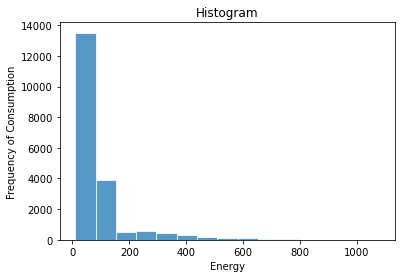

In [12]:
apps = df["Appliances"].tolist()

plt.hist(apps, 15, edgecolor='white', alpha=0.75)

plt.xlabel('Energy')
plt.ylabel('Frequency of Consumption')
plt.title('Typical Energy Consumption by Appliance')

plt.show()

4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

5. Plot appliances energy consumption vs. Press mm Hg.

6. It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.

Comments

# Task 3: